In [6]:
#sharpened = original + (original − unsharp) × amount
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]


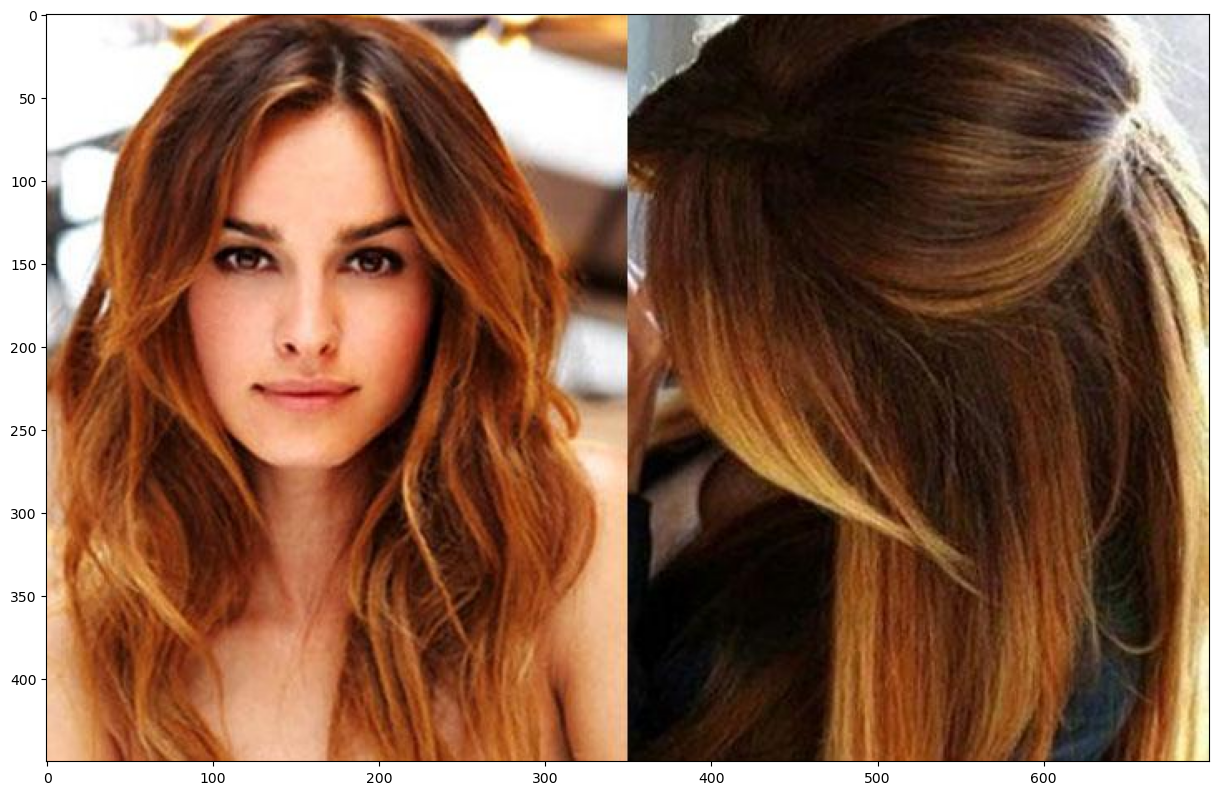

In [7]:
img = cv2.imread('haircut.jpg')
img = np.float32(img)
img = cv2.cvtColor(img/255, cv2.COLOR_BGR2RGB)
plt.imshow(img)

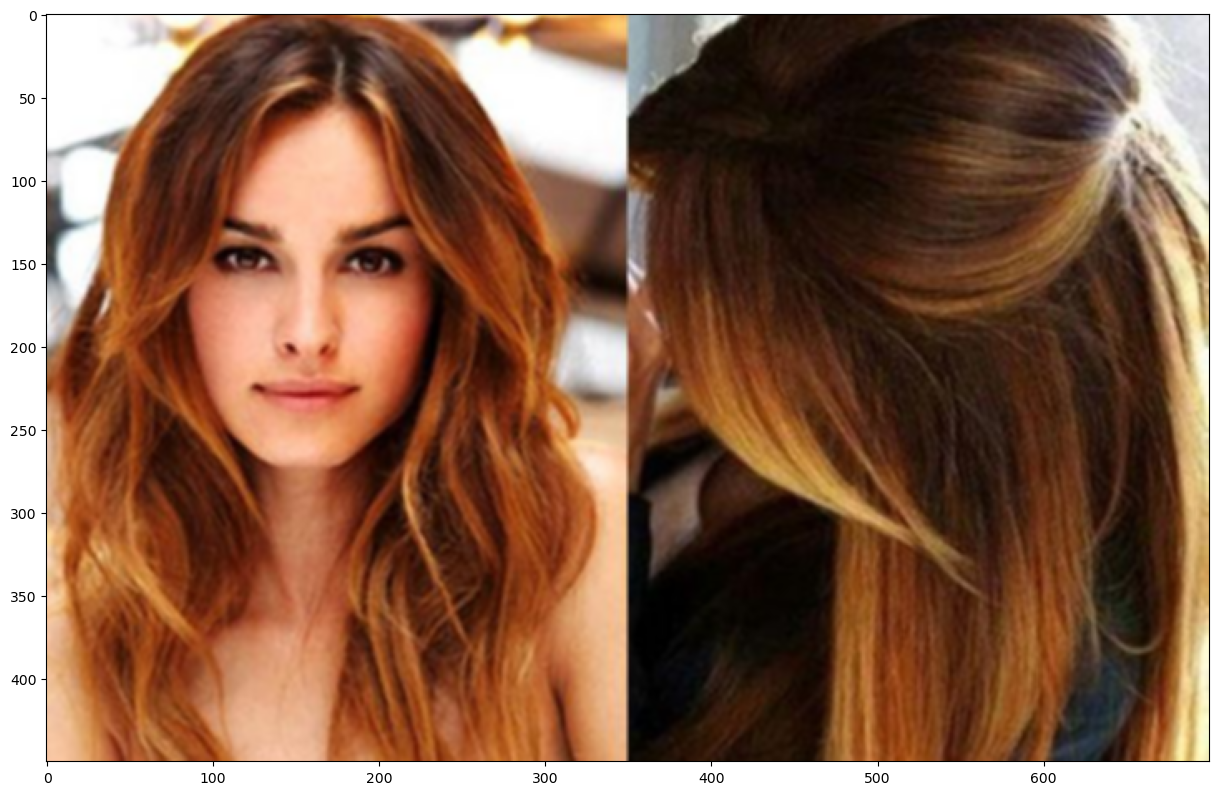

In [8]:
# Create a blurred (unsharp) version of the original image (you can use Gaussian blurring)
unsharp = cv2.GaussianBlur(img, ksize=(3,3), sigmaX=5)
unsharp = np.float32(unsharp)
plt.imshow(unsharp)

In [10]:
# Create the difference image (original − unsharp)
# Note: Remember that you are working with uint8 data types. Any addition or substractions
# might result in overflow or underflow, respectively. You can prevent this by casting the images to float.
diff = cv2.subtract(img, unsharp)

In [11]:
# Apply USM to get the resulting image using `sharpened = original + (original − unsharp) × amount`
# Note: Again, take care of underflows/overflows if necessary.
# amount = 0.5
amount = 3
rows, cols, channels = diff.shape
print(diff.shape)
inter = np.zeros_like(diff, dtype=np.float32)

for r in range(rows):
    for c in range(cols):
        for ch in range(channels):
            inter[r, c, ch] = diff[r, c, ch] * amount


(450, 700, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x7fef419a9a90>)

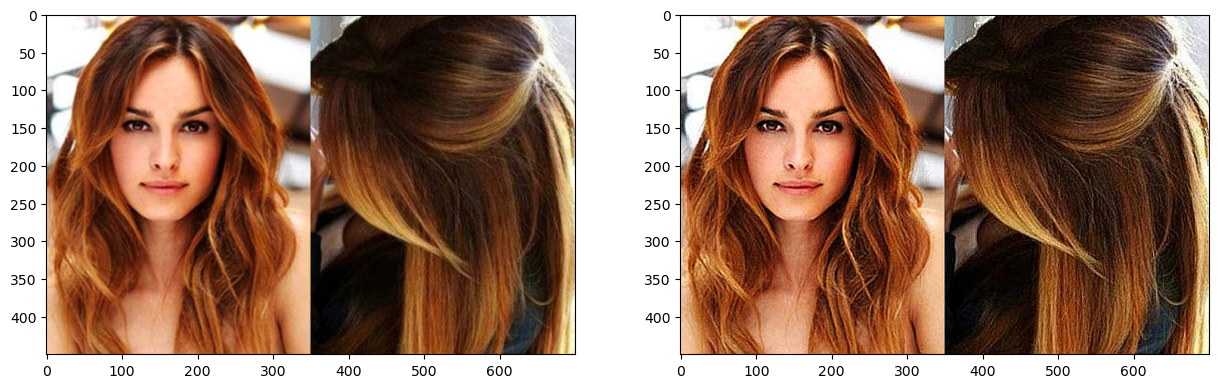

In [13]:
sharpened = cv2.add(img, inter)
plt.imshow(img)
plt.imshow(sharpened)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(sharpened)

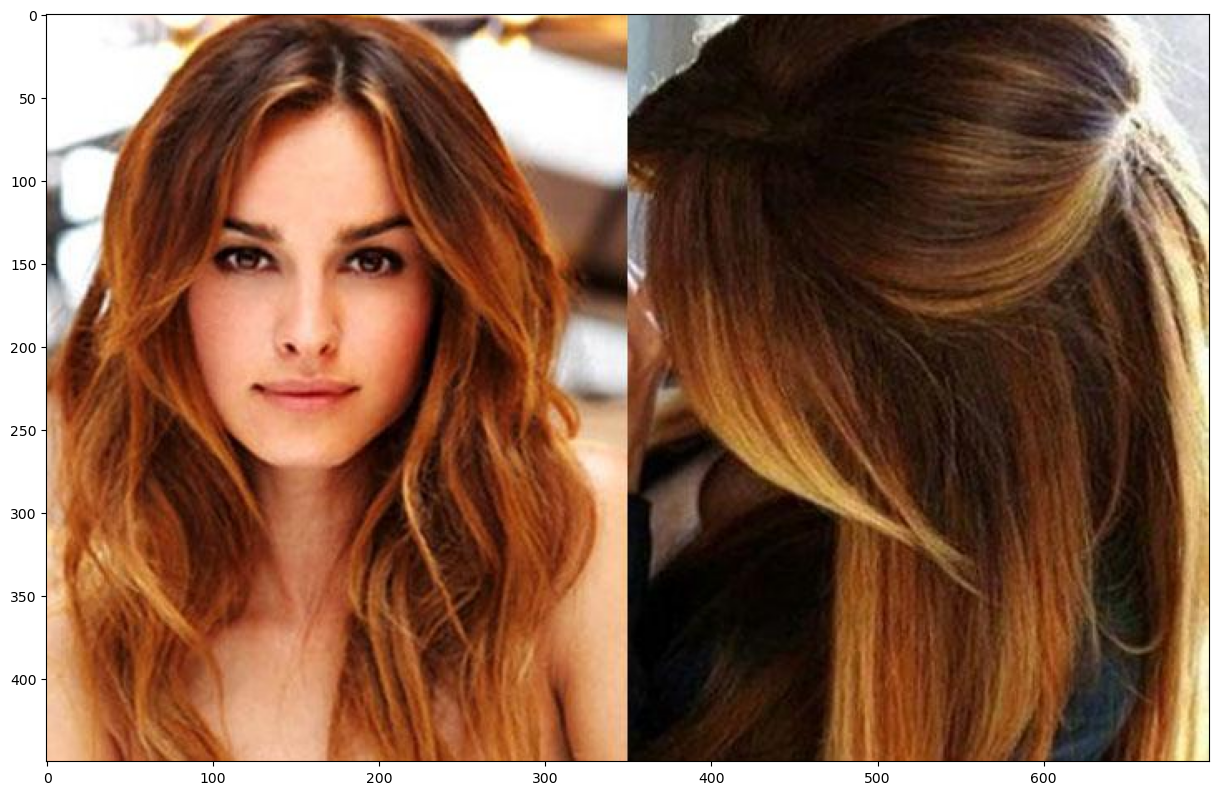

In [14]:
plt.imshow(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


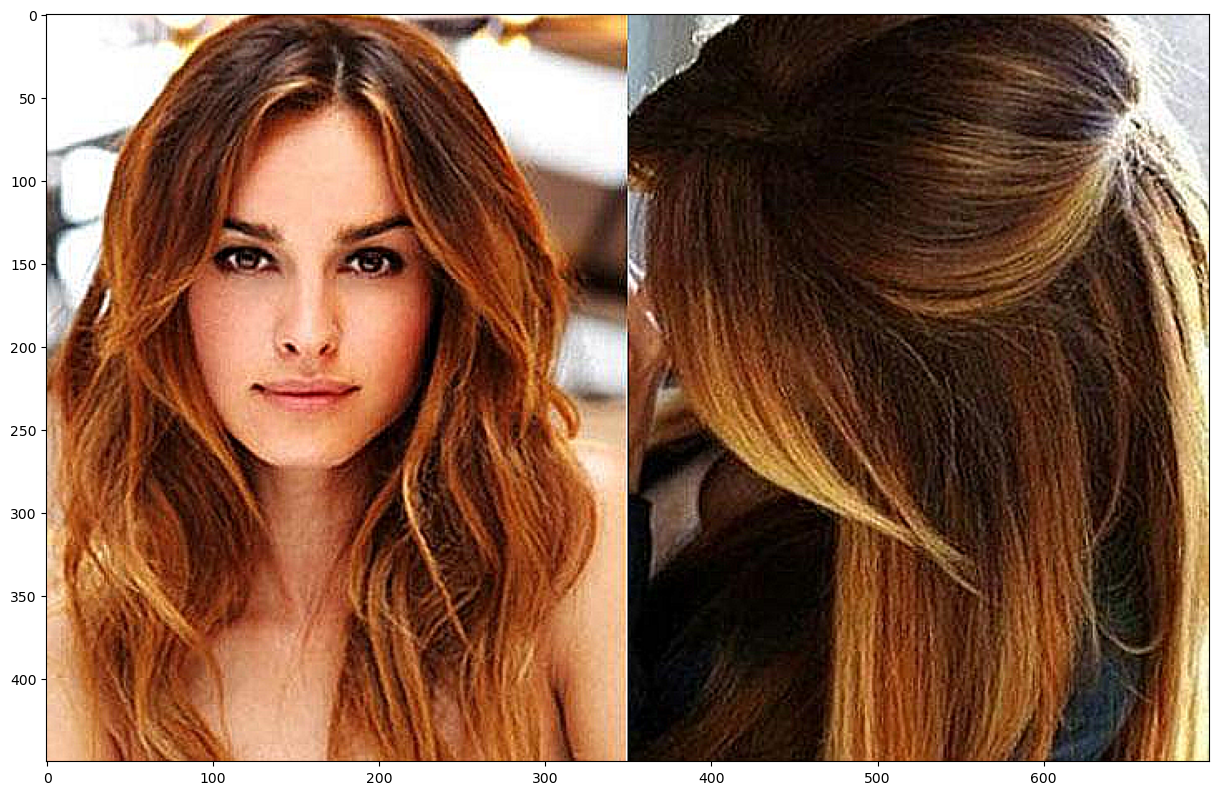

In [15]:
plt.imshow(sharpened)